In [0]:
import pandas as pd
import numpy as np

In [0]:
df_cluster = pd.read_csv("df_cluster2_v2.csv")

In [3]:
df_cluster.head()

,Unnamed: 0,Patient,Cluster Class,mean_nni_mean,mean_nni_std,rmssd_mean,rmssd_std,median_nni_mean,median_nni_std,mean_hr_mean,mean_hr_std,hf_mean,hf_std,vlf_mean,vlf_std,lf_hf_ratio_mean,lf_hf_ratio_std,Modified_csi_mean,Modified_csi_std,ratio_sd2_sd1_mean,ratio_sd2_sd1_std,crisis_frequency
0,7,143,2,606.007012,48.776505,43.364052,16.782507,597.976471,55.956824,101.185268,7.599264,1122.681805,239.719040,1329.409623,562.282734,3.841856,1.383608,1752.991788,493.984605,3.754517,0.569744,0.000000
1,43,704,2,681.608042,72.191845,8.363230,21.615758,685.368000,90.503746,89.034576,8.476716,58.094552,111.366283,317.277186,273.500778,19.521812,14.449280,1377.720311,1329.532269,7.847508,3.482272,0.000000
2,45,752,2,149.638889,299.277778,25.594117,13.773444,151.250000,302.500000,85.528071,6.647574,189.410950,243.546072,480.269306,438.445483,9.905283,6.839494,953.774959,894.083625,4.891838,2.076804,0.347826
3,50,827,2,442.424056,123.414058,15.690122,43.243720,441.723958,142.298530,85.528071,6.647574,229.670877,541.225809,154.662188,219.834242,10.112569,6.397138,1104.118729,2374.721705,5.436278,1.653705,0.006849
4,60,1026,2,716.953445,60.401262,12.549149,27.143744,721.406780,74.037786,84.404654,5.180437,199.968785,408.966515,69.706540,162.569751,1.436049,0.507712,319.220610,588.364901,2.229271,0.730721,0.008197


In [0]:
s = pd.Series(df_cluster['Patient'])

In [5]:
s

0       143
1       704
2       752
3       827
4      1026
      ...  
91    12262
92    12526
93    12751
94    13085
95    13182
Name: Patient, Length: 96, dtype: int64

In [0]:
l_2 = s.values.tolist()

In [7]:
l_2

[143,
 704,
 752,
 827,
 1026,
 1034,
 1169,
 1324,
 1357,
 1543,
 1653,
 1770,
 1843,
 1984,
 2297,
 2445,
 2614,
 2796,
 2807,
 3011,
 3401,
 3546,
 3636,
 3668,
 3977,
 4087,
 4208,
 4434,
 4799,
 5031,
 5034,
 5323,
 5347,
 5371,
 5426,
 5533,
 5554,
 5633,
 5740,
 5804,
 6107,
 6236,
 6351,
 6482,
 6507,
 6563,
 6904,
 7032,
 7038,
 7092,
 7095,
 7216,
 7555,
 7617,
 7771,
 7910,
 8100,
 8479,
 8512,
 8574,
 8616,
 8643,
 8829,
 8835,
 9050,
 9097,
 9107,
 9347,
 9694,
 9697,
 9839,
 9854,
 9880,
 10020,
 10062,
 10201,
 10412,
 10450,
 10480,
 10551,
 10584,
 10639,
 10843,
 11081,
 11171,
 11379,
 11454,
 11455,
 11927,
 11974,
 12218,
 12262,
 12526,
 12751,
 13085,
 13182]

In [0]:
df_label = pd.read_csv('xqrs_v2_cleaned.csv')

In [9]:
df_label.head()

,Unnamed: 0,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
0,193,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.0,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
1,194,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.0,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
2,195,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.0,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
3,196,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.0,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
4,197,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.0,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667


In [0]:
df_label_work = df_label[df_label['Patient'].isin(l_2)]

In [11]:
df_label_work

,Unnamed: 0,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
0,193,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.000000,0.0,0.000000,1.532157,664.062500,3.906250,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.000000,76.666667,46.666667
1,194,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.000000,1.0,6.666667,11.718750,675.781250,46.875000,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.000000,76.666667,46.666667
2,195,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.000000,1.0,6.666667,9.511195,660.156250,42.968750,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.000000,76.666667,46.666667
3,196,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.000000,0.0,0.000000,1.808242,660.156250,7.812500,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.000000,76.666667,46.666667
4,197,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.000000,0.0,0.000000,2.470529,664.062500,15.625000,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.000000,76.666667,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,13513,train,01_tcp_ar,75,7555,s008_2012_04_26,t004,601,0.988399,0.950268,56.0,560000.0,677.083333,55.839600,12.846947,0.0,0.000000,3.0,20.000000,16.307633,642.578125,140.625000,0.024085,0.082471,89.151444,95.700935,78.167939,6.735406,3330.311874,279.181244,7202.299244,11.928852,NaN,NaN,NaN,inf,NaN,NaN,NaN,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004,60.0,96.721311,85.245902,70.491803
8688,13514,train,01_tcp_ar,75,7555,s008_2012_04_26,t004,601,0.988399,0.950268,57.0,570000.0,837.890625,25.329088,15.474971,0.0,0.000000,2.0,16.666667,15.801559,839.843750,74.218750,0.018859,0.030230,71.669390,75.851852,69.345372,2.108263,3777.763549,365.070245,7236.074956,10.348046,6.712194,4.872632,4749.115363,0.342095,26.352617,176.883872,6.712194,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004,60.0,96.721311,85.245902,70.491803
8689,13515,train,01_tcp_ar,75,7555,s008_2012_04_26,t004,601,0.988399,0.950268,58.0,580000.0,833.658854,19.616881,12.380689,0.0,0.000000,1.0,8.333333,12.380689,835.937500,50.781250,0.014851,0.023531,72.008664,74.563107,70.136986,1.632650,2925.081753,415.499310,5728.949684,7.039920,6.429372,4.896038,4573.744668,0.605286,27.661441,177.845696,6.429372,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004,60.0,96.721311,85.245902,70.491803
8690,13516,train,01_tcp_ar,75,7555,s008_2012_04_26,t004,601,0.988399,0.950268,59.0,590000.0,785.970052,34.403018,23.053686,1.0,8.333333,2.0,16.666667,23.274170,763.671875,80.078125,0.029612,0.043771,76.469891,79.379845,71.775701,3.129066,2180.516615,368.659206,5375.277207,5.914722,6.697916,4.811635,4412.931229,0.477330,24.591656,164.712847,6.697916,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004,60.0,96.721311,85

In [0]:
df_label_def = df_label_work.drop(['Unnamed: 0','Set','Categorie Montage','Dossier Patient','File N°','exam_duration','Pan_vs_XQRS','SWT_vs_XQRS','Session','max_duration','mean_nni%','csi%','hf%'],axis=1)

In [13]:
df_label_def

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam
0,8643,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.000000,0.0,0.000000,1.532157,664.062500,3.906250,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
1,8643,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.000000,1.0,6.666667,11.718750,675.781250,46.875000,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
2,8643,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.000000,1.0,6.666667,9.511195,660.156250,42.968750,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
3,8643,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.000000,0.0,0.000000,1.808242,660.156250,7.812500,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
4,8643,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.000000,0.0,0.000000,2.470529,664.062500,15.625000,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,7555,56.0,560000.0,677.083333,55.839600,12.846947,0.0,0.000000,3.0,20.000000,16.307633,642.578125,140.625000,0.024085,0.082471,89.151444,95.700935,78.167939,6.735406,3330.311874,279.181244,7202.299244,11.928852,NaN,NaN,NaN,inf,NaN,NaN,NaN,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004
8688,7555,57.0,570000.0,837.890625,25.329088,15.474971,0.0,0.000000,2.0,16.666667,15.801559,839.843750,74.218750,0.018859,0.030230,71.669390,75.851852,69.345372,2.108263,3777.763549,365.070245,7236.074956,10.348046,6.712194,4.872632,4749.115363,0.342095,26.352617,176.883872,6.712194,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004
8689,7555,58.0,580000.0,833.658854,19.616881,12.380689,0.0,0.000000,1.0,8.333333,12.380689,835.937500,50.781250,0.014851,0.023531,72.008664,74.563107,70.136986,1.632650,2925.081753,415.499310,5728.949684,7.039920,6.429372,4.896038,4573.744668,0.605286,27.661441,177.845696,6.429372,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004
8690,7555,59.0,590000.0,785.970052,34.403018,23.053686,1.0,8.333333,2.0,16.666667,23.274170,763.671875,80.078125,0.029612,0.043771,76.469891,79.379845,71.775701,3.129066,2180.516615,368.659206,5375.277207,5.914722,6.697916,4.811635,4412.931229,0.477330,24.591656,164.712847,6.697916,0.0,train_01_tcp_ar_7555_s008_2012_04_26_t004


In [0]:
df_RF = df_label_def.replace([np.inf, -np.inf], np.nan)

In [0]:
df_RF = df_RF.groupby(df_RF['cle_exam']).transform(lambda x: x.fillna(x.mean()))

In [16]:
df_RF

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
0,8643,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.000000,0.0,0.000000,1.532157,664.062500,3.906250,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
1,8643,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.000000,1.0,6.666667,11.718750,675.781250,46.875000,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
2,8643,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.000000,1.0,6.666667,9.511195,660.156250,42.968750,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
3,8643,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.000000,0.0,0.000000,1.808242,660.156250,7.812500,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
4,8643,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.000000,0.0,0.000000,2.470529,664.062500,15.625000,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,46.079051,5.063510,50.863572,22.475111,4.732654,3.087285,354.701600,0.517062,6.555356,19.970406,4.732654,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,7555,56.0,560000.0,677.083333,55.839600,12.846947,0.0,0.000000,3.0,20.000000,16.307633,642.578125,140.625000,0.024085,0.082471,89.151444,95.700935,78.167939,6.735406,3330.311874,279.181244,7202.299244,11.928852,3.965008,4.512334,1703.719862,0.880099,23.592455,92.934547,3.965008,0.0
8688,7555,57.0,570000.0,837.890625,25.329088,15.474971,0.0,0.000000,2.0,16.666667,15.801559,839.843750,74.218750,0.018859,0.030230,71.669390,75.851852,69.345372,2.108263,3777.763549,365.070245,7236.074956,10.348046,6.712194,4.872632,4749.115363,0.342095,26.352617,176.883872,6.712194,0.0
8689,7555,58.0,580000.0,833.658854,19.616881,12.380689,0.0,0.000000,1.0,8.333333,12.380689,835.937500,50.781250,0.014851,0.023531,72.008664,74.563107,70.136986,1.632650,2925.081753,415.499310,5728.949684,7.039920,6.429372,4.896038,4573.744668,0.605286,27.661441,177.845696,6.429372,0.0
8690,7555,59.0,590000.0,785.970052,34.403018,23.053686,1.0,8.333333,2.0,16.666667,23.274170,763.671875,80.078125,0.029612,0.043771,76.469891,79.379845,71.775701,3.129066,2180.516615,368.659206,5375.277207,5.914722,6.697916,4.811635,4412.931229,0.477330,24.591656,164.712847,6.697916,0.0


In [0]:
df_RF['label'] = df_RF['label'].apply(lambda x: "1" if (x!=0) else  "0" )


In [18]:
df_RF['label']

0       0
1       0
2       0
3       0
4       0
       ..
8687    0
8688    0
8689    0
8690    0
8691    0
Name: label, Length: 835, dtype: object

In [0]:
a = pd.Series(df_RF['label'])

In [20]:
a.value_counts()

0    675
1    160
Name: label, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X = df_RF.iloc[:, :-1]
y = df_RF.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

X_train = numeric_transformer.fit_transform(X_train)

In [23]:
X_train

array([[ 1.81016212,  1.5337735 ,  1.5337735 , ...,  0.33139923,
         0.12602836, -0.45617583],
       [ 1.81016212, -0.7264278 , -0.7264278 , ..., -0.50099816,
        -0.37666039, -0.05172524],
       [ 1.81016212, -0.57773035, -0.57773035, ...,  0.33139923,
         0.12602836, -0.45617583],
       ...,
       [ 0.08560339,  3.25866396,  3.25866396, ..., -1.30919866,
        -1.5482846 , -0.39307389],
       [ 1.81016212,  1.86090789,  1.86090789, ...,  0.33139923,
         0.12602836, -0.45617583],
       [-1.19925593, -0.33981442, -0.33981442, ..., -0.2064143 ,
         1.00874604,  0.92507488]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_train, y_train)

1.0

In [0]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50)}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params).fit(X_train, y_train)

In [26]:
classifier.best_params_

{'n_estimators': 49}

In [0]:
X_test = numeric_transformer.fit_transform(X_test)

In [28]:
classifier.best_estimator_.score(X_test, y_test)

0.9282868525896414

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred)

['0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1'
 '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0'
 '1' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

In [30]:
print(y_test)

3869    0
8606    0
5614    0
4473    1
1       0
       ..
8684    0
8551    0
8546    0
4357    1
3946    0
Name: label, Length: 251, dtype: object


In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='binary',pos_label='1')

0.823529411764706

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


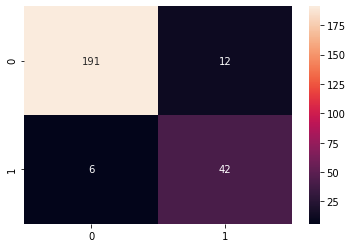

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       203
           1       0.78      0.88      0.82        48

   micro avg       0.93      0.93      0.93       251
   macro avg       0.87      0.91      0.89       251
weighted avg       0.93      0.93      0.93       251



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
